<a href="https://colab.research.google.com/github/krzysztofnowakuz/DS_postgraduate/blob/main/clustering_stud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

W tym notebooku pokażemy jak w pythonie dokonać klasteryzacji danych numerycznych. Wykorzystamy nieśmiertelny zbiór danych Iris, który opisuje kwiaty z gatunku irysów. Jest to prawdopobnie najpopularniejszy zbiór danych zawarty w literatuze do wykrywania wzorców w danych. Artykuł Fisher'a jest klasykiem w tej dziedzinie, i jest często cytowany po dziś dzień. Zbiór danych posiada 150 obserwacji (3 klasy kwiatów po 50 obserwacji).



Zmienne:

1. długość kielicha (sepal) w cm
2. szerokość kielicha w cm
3. długość płatka (petal) w cm
4. szerokość płatka in cm
5. klasa:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica



Przyjrzymy się również dwóm dodatkowym zbiorom dotyczącym klientów banków.




# Import bibliotek

In [ ]:
import sklearn.cluster as clust
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [ ]:
%matplotlib inline

# Wczytywanie danych

In [ ]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['y'] = iris.target

Pokaż pierwsze 10 obserwacji, za pomocą odpowiedniej metody wyświetl statystyki opisowe

In [ ]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Exploracja danych

Stwórzmy wykres punktowy - zależność długości od szerokości kielicha:

``plt.scatter(x,y)``

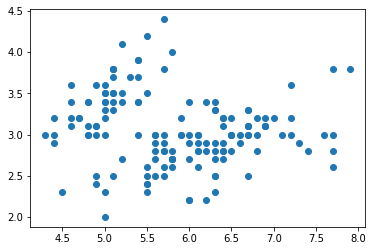

In [ ]:
plt.scatter(data["sepal length (cm)"], data["sepal width (cm)"])

Oraz wykres punktowy - zależność długości i szerokości płatka

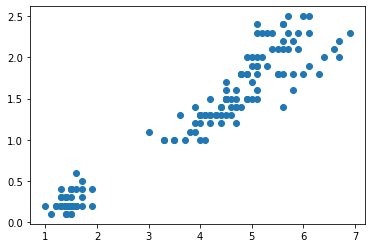

In [ ]:
plt.scatter(data["petal length (cm)"], data["petal width (cm)"])

Możemy zauważyć parę klastrów obserwacji. Wypróbujemy kilka wariantów przy pomocy odpowiednich metod

# Metoda k-średnich

Wybierz dwie kolumny do klastrowania (będziemy również wizualizować dane za pomocą scatterplota)

In [ ]:
columns_to_cluster = ["petal length (cm)", "petal width (cm)"]

In [ ]:
from sklearn.cluster import KMeans

Zdefiniujmy sobie funkcję pomocniczą do robienia wykresu dla zadanego grupowania

In [ ]:
def print_clustering(data, labels):
    labels_and_styles = dict(zip(range(5), list("v*+xDop")))
    
    for i in range(data.shape[0]):
        lab = labels[i]
        marker = labels_and_styles.get(lab, '*')
        plt.scatter(data.iloc[i, 0], data.iloc[i, 1], marker=labels_and_styles[lab], c='b')
    
    plt.show()

Wypróbujmy algorytm k-średnich dla różnych wartości k

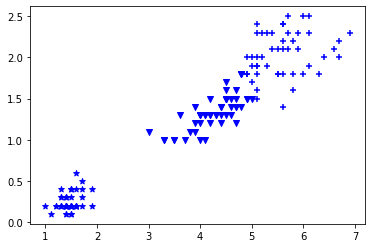

In [ ]:
k_3 = KMeans(n_clusters=3)
k_3.fit(data[columns_to_cluster])
print_clustering(data[columns_to_cluster], k_3.labels_)

k=4

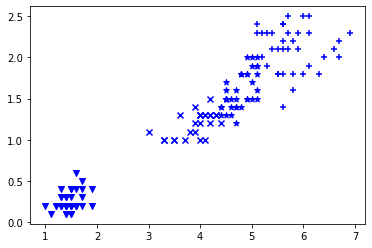

In [ ]:
k_4 = KMeans(n_clusters=4)
k_4.fit(data[columns_to_cluster])
print_clustering(data[columns_to_cluster], k_4.labels_)

k=2

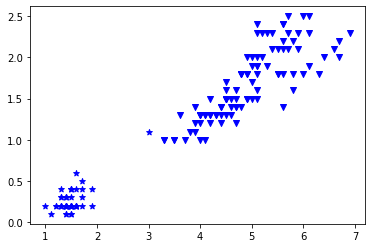

In [ ]:
k_2 = KMeans(n_clusters=2)
k_2.fit(data[columns_to_cluster])
print_clustering(data[columns_to_cluster], k_2.labels_)

In [ ]:
columns_to_cluster = ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']

# Jakość grupowania

**Współczynnik SILHOUETTE**

Formally:

* a: Średni dystans między elementem klastra a wszystkimi innymi punktami w tym samym klastrze.
* b: średni dystans między elementem klastra, a wszystkimi innymi punktami w najbliższym klastrze.


$$ s = \frac{b - a }{max(a,b)} $$


Inną metryką poprawności jest **Współczynnik Calińskiego-Harabasza**, 

* N - liczba obserwacji
* k - liczba klastrów

$$W_k = \sum^k_{q=1} \sum_{x \in C_1} (x - c_q)^2$$


$$B_k = \sum^k_{q=1} n_q (c_q -c)^2 $$

$$calinski(k) = \frac{Tr(B_k)}{Tr(W_k)} \times \frac{N-K}{K-1}$$

Napisz pętlę, która przeiteruje przez możliwe k (od 2 do 9), następnie miary dopasowania dodaj do odpowiednich list

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

k_clusters = []
silhouette = []
calinski = []
suma_kwadratow = []

for k in range(2, 10):
    km = KMeans(n_clusters=k)
    km.fit(data[columns_to_cluster])
    
    
    k_clusters.append(k)
    silhouette.append(silhouette_score(data[columns_to_cluster], km.labels_))
    calinski.append(calinski_harabasz_score(data[columns_to_cluster], km.labels_))
    suma_kwadratow.append(km.inertia_)

Wykreśl wartość współczynnika silhouette w zależności od liczby klastrów

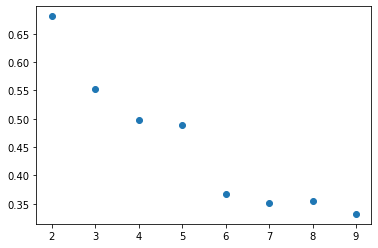

In [ ]:
plt.scatter(k_clusters, silhouette)

A także Calińskiego Harabasza:

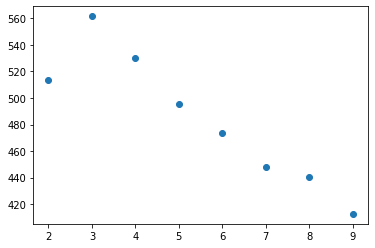

In [ ]:
plt.scatter(k_clusters, calinski)

Oraz wartości wewnątrzgrupowej sumy kwadratów:

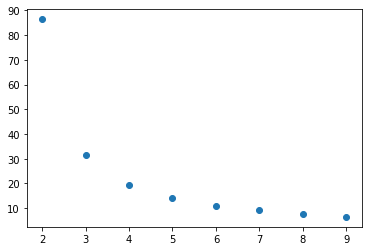

In [ ]:
plt.scatter(k_clusters, suma_kwadratow)

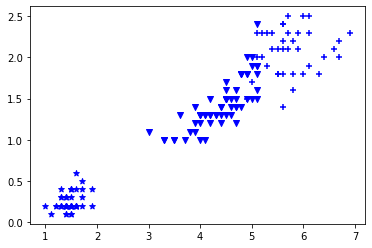

In [ ]:
k_3 = KMeans(n_clusters=3)
k_3.fit(data[columns_to_cluster])
print_clustering(data[['petal length (cm)', 'petal width (cm)']], k_3.labels_)

In [ ]:
data["clusters"] = k_3.labels_

In [ ]:
data.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y,clusters
140,6.7,3.1,5.6,2.4,2,2
141,6.9,3.1,5.1,2.3,2,2
142,5.8,2.7,5.1,1.9,2,0
143,6.8,3.2,5.9,2.3,2,2
144,6.7,3.3,5.7,2.5,2,2
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2
149,5.9,3.0,5.1,1.8,2,0


# Inny przykład

Wczytujemy fikcyjne dane dotyczące klientów pewnego banku. Trzy zmienne dotyczą:
* wieku
* przeciętnych zarobków
* przeciętnie odkładanych środków na oszczędności (jako % zarobków)

Twoim zadaniem będzie dokonanie ich klasteryzacji

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving banking_data.csv to banking_data.csv


In [ ]:
klienci_banku = pd.read_csv('banking_data.csv')

In [ ]:
klienci_banku.head()

,oszczednosci,wiek,zarobki
0,0.134,50,7141.52
1,0.125,34,4841.35
2,0.048,34,2415.62
3,0.241,30,2610.52
4,0.081,45,2431.64


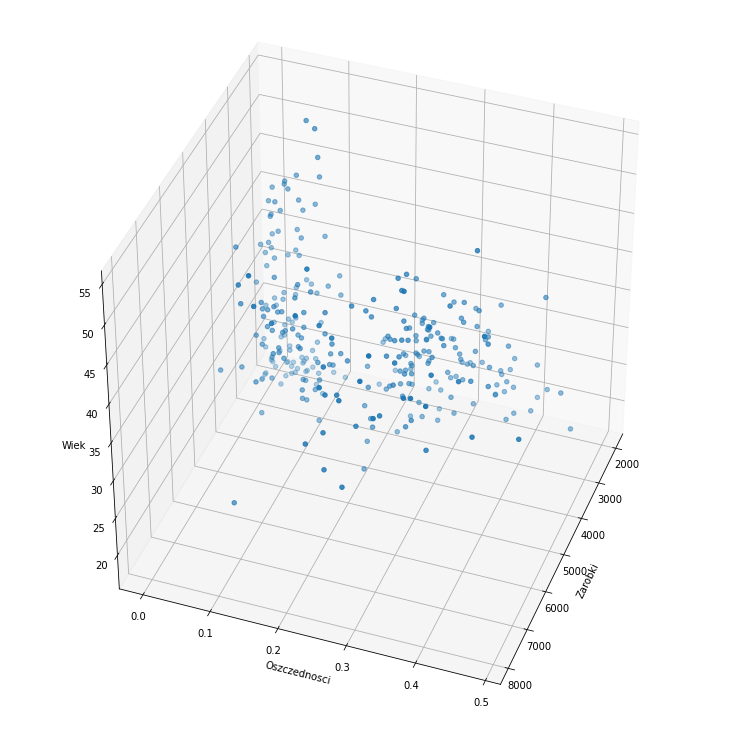

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(klienci_banku['zarobki'], klienci_banku['oszczednosci'], klienci_banku['wiek'])
ax.set_xlabel('Zarobki')
ax.set_ylabel('Oszczednosci')
ax.set_zlabel('Wiek')
ax.view_init(39, 20)
plt.show()

Ale najpierw, policz z odległość między pierwszym i drugim klientem ze zbioru (odległością euklidesową). Aby to zrobić, stwórz funkcję, która przyjmuje dwa wektory i zwraca jedną wartość będącą odległością euklidesową między tymi wektorami

In [ ]:
def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1 - row2)**2))

euclidean_distance(klienci_banku.iloc[0, 0:3], klienci_banku.iloc[1, 0:3])

2300.2256474052715

Dokonaj standaryzacji danych (od każdej zmiennej odejmij średnią, i podziel przez jej odchylenie standardowe)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
klienci_banku_scaled = scaler.fit_transform(klienci_banku)

In [ ]:
klienci_banku_scaled

array([[-4.13818355e-01,  2.16771346e+00,  2.26011602e+00],
       [-4.83754274e-01,  2.89550173e-01,  7.01956805e-01],
       [-1.08209491e+00,  2.89550173e-01, -9.41258071e-01],
       [ 4.17642012e-01, -1.79990648e-01, -8.09230772e-01],
       [-8.25663210e-01,  1.58078743e+00, -9.30405955e-01],
       [ 8.91652128e-01,  1.81555784e+00,  2.69143681e+00],
       [-5.45919535e-01, -4.14761059e-01,  4.51111711e-01],
       [-8.80057814e-01,  2.89550173e-01,  4.98814956e-01],
       [-6.85791373e-01, -8.84301881e-01,  2.28771372e+00],
       [-1.12094820e+00,  6.41705790e-01, -9.96270574e-01],
       [-1.22196675e+00, -1.58861311e+00, -8.17325827e-01],
       [-1.45508648e+00,  2.89550173e-01, -8.56954339e-01],
       [-6.31396769e-01,  1.72164968e-01, -6.38530110e-01],
       [ 1.84744302e+00,  6.41705790e-01, -7.63180409e-01],
       [-1.14426017e+00, -1.58861311e+00, -9.18246438e-01],
       [ 4.95348589e-01, -2.97375854e-01,  9.56202498e-03],
       [-5.69231508e-01, -8.84301881e-01

Wyświetl za pomocą metod ``.mean_``, ``.scale_`` informację o średniej i odchyleniu jakie były zastosowane w standaryzacji

In [ ]:
scaler.mean_

array([1.87253968e-01, 3.15333333e+01, 3.80511444e+03])

In [ ]:
scaler.scale_

array([1.28689237e-01, 8.51896111e+00, 1.47620986e+03])

Przedstaw ramkę

Podaj odległość euklidesową po standaryzacji

In [ ]:
# odległość euklidesowa po standaryzacji:
euclidean_distance(klienci_banku_scaled[0,0:3], klienci_banku_scaled[1,0:3])

2.4413620201799358

Dokonaj klastrowania metodą k-średnich. Przyjmij liczbę skupień jako 3

In [ ]:
km = KMeans(n_clusters=3)
km.fit(klienci_banku_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Do którego skupienia przyporządkowano poszczególne obserwacje?

In [ ]:
km.labels_

array([0, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 0, 0,
       2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 1, 1, 2, 2,
       0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0,
       2, 2, 0, 2, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 0, 2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 1,
       2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 2, 0, 2,
       2, 1, 2, 2, 0, 0, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2,
       2, 0, 2, 1, 0, 2, 2, 1, 1, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0,
       0, 1, 1, 0, 0, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0, 0, 2, 1,
       1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0,
       2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 1, 2, 0, 0, 1, 0, 1, 1, 2, 2,
       2, 2, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1,

Jakie są centra skupień? jak byś je scharakteryzował? 
Żeby dane powróciły do poprzedniej formy sprzed standaryzacji wykorzystaj metodę ``inverse_transform()`` obiektu scaler

In [ ]:
km.cluster_centers_

array([[ 0.66712102,  1.25746327,  1.64552968],
       [ 0.85707929, -0.35009972, -0.29225436],
       [-0.99400896, -0.21688314, -0.42363698]])

In [ ]:
scaler.inverse_transform(km.cluster_centers_)

array([[2.73105263e-01, 4.22456140e+01, 6.23426158e+03],
       [2.97550847e-01, 2.85508475e+01, 3.37368568e+03],
       [5.93357143e-02, 2.96857143e+01, 3.17973736e+03]])

Przedstaw na wykresie 3D dane, a kolorem oznacz numer skupiska.
W ``ax.scatter`` dodaj parametr ``c=`` i przypisz do niego etykiety grupy do jakich zostały przypisane

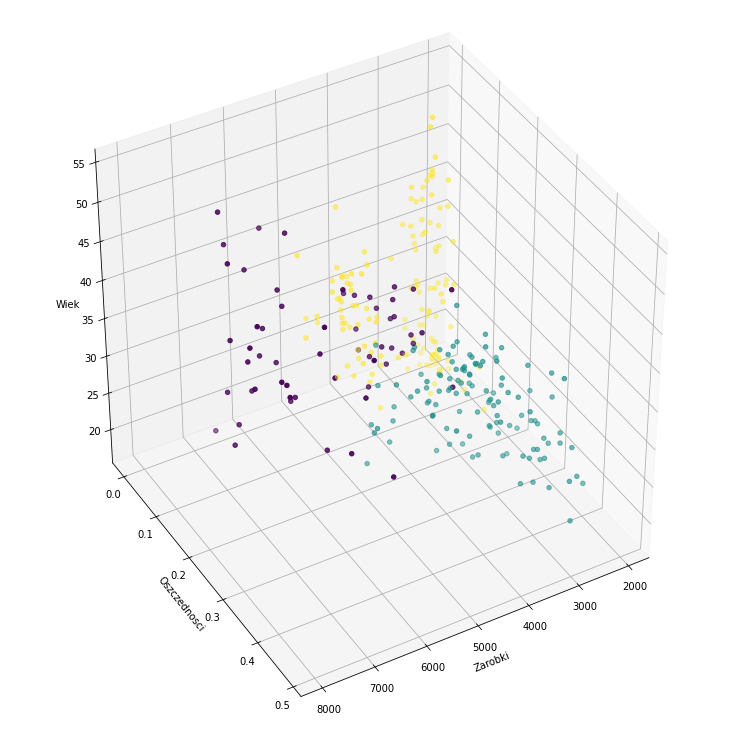

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(klienci_banku['zarobki'], klienci_banku['oszczednosci'], klienci_banku['wiek'], c = km.labels_)
ax.set_xlabel('Zarobki')
ax.set_ylabel('Oszczednosci')
ax.set_zlabel('Wiek')
ax.view_init(39, 60)
plt.show()

Przedstaw miary jakości klastrowania dla tego modelu. Uwzględnij wewnątrzklastrową sumę ochyleń

Za pomocą pętli, przeanalizuj modele k-means dla k z zakresu (2,14), i porównaj miary jakości dopasowania. Ile klastrów byś wybrał?

In [ ]:
k_clusters = []
silhouette = []
calinski = []
suma_kwadratow = []

for k in range(2, 15):
    km = KMeans(n_clusters=k)
    km.fit(klienci_banku_scaled)
    
    
    k_clusters.append(k)
    silhouette.append(silhouette_score(klienci_banku_scaled, km.labels_))
    calinski.append(calinski_harabasz_score(klienci_banku_scaled, km.labels_))
    suma_kwadratow.append(km.inertia_)

Wyświetl wykresy różnych metryk poprawności w zależności od liczby wybranych klastrów:

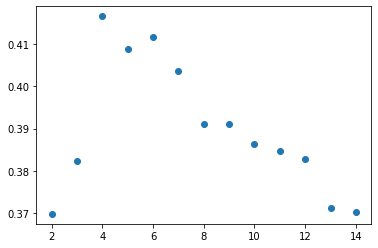

In [ ]:
plt.scatter(k_clusters, silhouette)

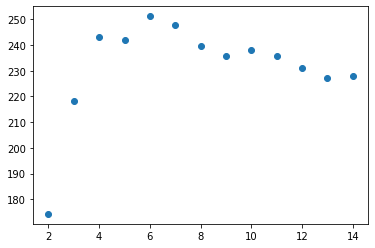

In [ ]:
plt.scatter(k_clusters, calinski)

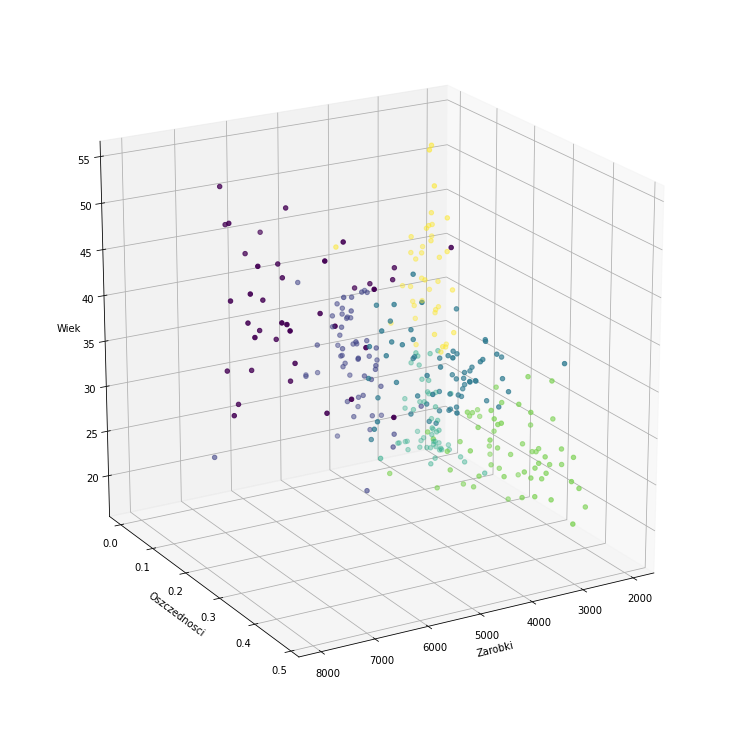

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(klienci_banku['zarobki'], klienci_banku['oszczednosci'], klienci_banku['wiek'], c = km.labels_)
ax.set_xlabel('Zarobki')
ax.set_ylabel('Oszczednosci')
ax.set_zlabel('Wiek')
ax.view_init(20, 60)
plt.show()

Dokonaj grupowania za pomocą wybranego k, stwórzy wykres 3D z klastrami, wyświetl informacje o średnich i scharakteryzuj tak powstałe klastry klientów banku

In [ ]:
km = KMeans(n_clusters=4)
km.fit(klienci_banku_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
scaler.inverse_transform(km.cluster_centers_)

array([[2.82205128e-01, 4.40769231e+01, 6.79968821e+03],
       [1.07535714e-01, 3.19285714e+01, 4.54905464e+03],
       [2.85530303e-01, 3.42878788e+01, 4.04033909e+03],
       [4.09230769e-02, 2.09615385e+01, 2.50090288e+03],
       [3.11870968e-01, 2.50161290e+01, 2.89465823e+03],
       [4.12000000e-02, 3.80500000e+01, 2.56245025e+03]])

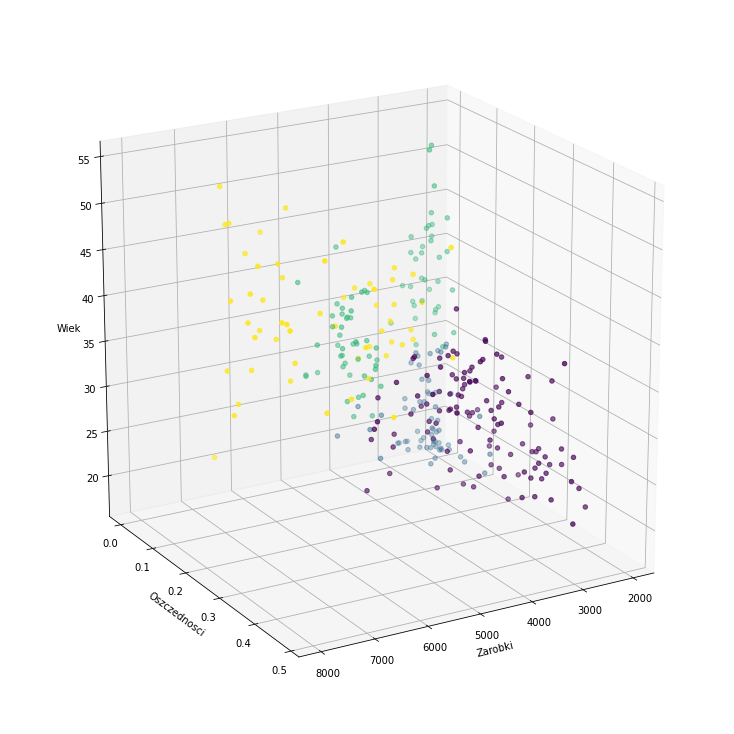

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(klienci_banku['zarobki'], klienci_banku['oszczednosci'], klienci_banku['wiek'], c = km.labels_)
ax.set_xlabel('Zarobki')
ax.set_ylabel('Oszczednosci')
ax.set_zlabel('Wiek')
ax.view_init(20, 60)
plt.show()

# Metoda aglomeracyjna

Przeanalizujemy dane o tych samych klientach banku

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# stwórzmy macierz połączeń
linkage_matrix = linkage(klienci_banku_scaled, 'ward')

In [ ]:
linkage_matrix

array([[1.43000000e+02, 1.86000000e+02, 1.58335534e-02, 2.00000000e+00],
       [2.50000000e+02, 2.58000000e+02, 1.64815024e-02, 2.00000000e+00],
       [2.17000000e+02, 2.20000000e+02, 1.79400433e-02, 2.00000000e+00],
       ...,
       [6.07000000e+02, 6.25000000e+02, 1.43402255e+01, 1.42000000e+02],
       [6.23000000e+02, 6.26000000e+02, 2.04412869e+01, 2.51000000e+02],
       [6.24000000e+02, 6.27000000e+02, 2.57652117e+01, 3.15000000e+02]])

Tworzymy wykres dendrogramu:

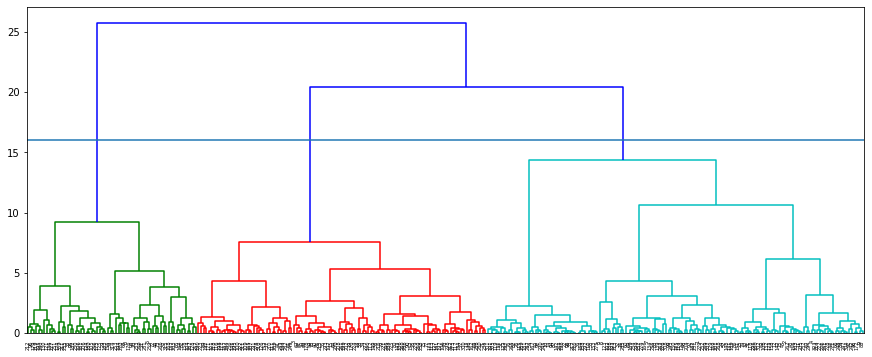

In [ ]:
plt.figure(figsize=(15,6))
dendrogram(linkage_matrix)
plt.axhline(16)

In [ ]:
clusts = fcluster(linkage_matrix, t=4, criterion="maxclust")

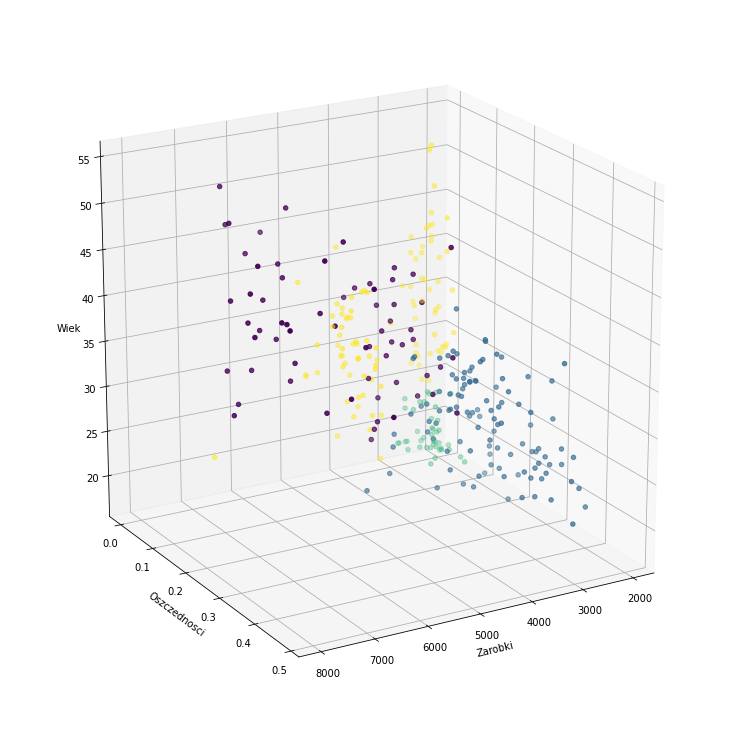

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(klienci_banku['zarobki'], klienci_banku['oszczednosci'], klienci_banku['wiek'], c = clusts)
ax.set_xlabel('Zarobki')
ax.set_ylabel('Oszczednosci')
ax.set_zlabel('Wiek')
ax.view_init(20, 60)
plt.show()

Za pomocą odpowiednich współczynników sprawdź, które z rodzajów połączeń między klastrami daje najlepsze wyniki. Zajrzyj do dokumentacji funkcji linkage (np ``single, complete, average, weighted, centroid, median``)

Za pomocą funkcji ``fluster`` możemy automatycznie przypisać każdemu obiektowi numer jego klastra określając zadaną przez nas liczbę klastrów ``criterion='maxclust'`` bądź odległości przy której podzielić klastry: ``criterion='distance'``

Za pomocą współczynnika silhouette porównaj jakość klastrowania hierarchicznego dla danych podzielonych na trzy klastry za pomocą:
- metody warda
- metody pojedynczego łączenia
- metody średniej

## Grupowanie k-modes

Wczytaj dane dotyczące klientów banku z pliku csv ``bankmarketing.csv`` bądź ze strony: https://www.kaggle.com/ashydv/bank-marketing

In [ ]:
data = pd.read_csv('bankmarketing.csv')

Wyświetl typy danych, i za pomocą metody .value_counts() podaj statystyki dla zmiennych 'job', 'marital', 'education', 'housing'

Za pomocą funkcji pd.bin przekonwertuj wiek do zmiennej kategorialnej. Kategorie - [0-20], [20-30], [30-40] itd... (zobacz wcześniej jaka jest wartość maksymalna i minimalna

Stwórz nową ramkę tylko z pięcioma zmiennymi kategorialnymi i opisz ją za pomocą metody .describe()

Zakoduj wszystkie z pięciu zmiennych za pomocą modułu preprocessing

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


Zainstaluj, zaimportuj i wykorzystaj bibliotekę k-modes, a także uzyj jej do klastrowania cech klientów

In [ ]:
from kmodes.kmodes import KModes

In [ ]:
km = KModes(n_clusters=2, init = "Huang", n_init = 5, verbose=1)
fitClusters_cao = km.fit_predict(bank_cust)

NameError: name 'KModes' is not defined

In [ ]:
km.cluster_centroids_

NameError: name 'km' is not defined

Przeprowadź analizę wartości funkcji kosztu w zależności od liczby k

I przedstaw na wykresie:

Informację o numerze klastra połącz z oryginalną ramką danych, a następnie wyświetl informacje o elementach z klastra

Dla każdego klastra przedstaw statystyki częstości według danej ramki. Będzie to kwestia zrobienia pętli po zmiennych i wyprintowania: ``value_counts(normalize=True)``dla każdej kolumny.

## Porównanie metod clusteringu na danych o różnej strukturze

In [ ]:
from sklearn import datasets

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5],random_state=random_state)

Powyżej wygenerowano kilka zbiorów danych 2D o różnej strukturze. Twoim zadaniem jest dokonanie klasteryzacji wszystkimi poznanymi metodami (k-means, hierarchiczne, dbscan), oraz przedstawienie wizualnie efektów klastrowania dla każdego ze zbiorów danych. Przykładowe klastrowanie k-means dla zbioru noisy_circles:

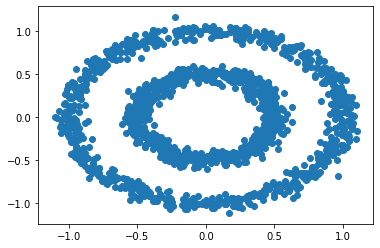

In [ ]:
plt.scatter(noisy_circles[0][:,0], noisy_circles[0][:,1])

In [ ]:
km_noisy = KMeans(n_clusters=2)
labels = km_noisy.fit_predict(noisy_circles[0])

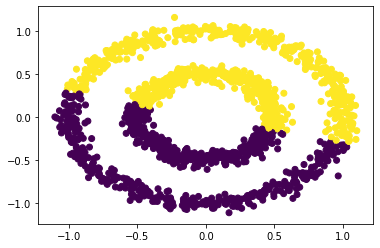

In [ ]:
plt.scatter(noisy_circles[0][:,0], noisy_circles[0][:,1], c=labels)